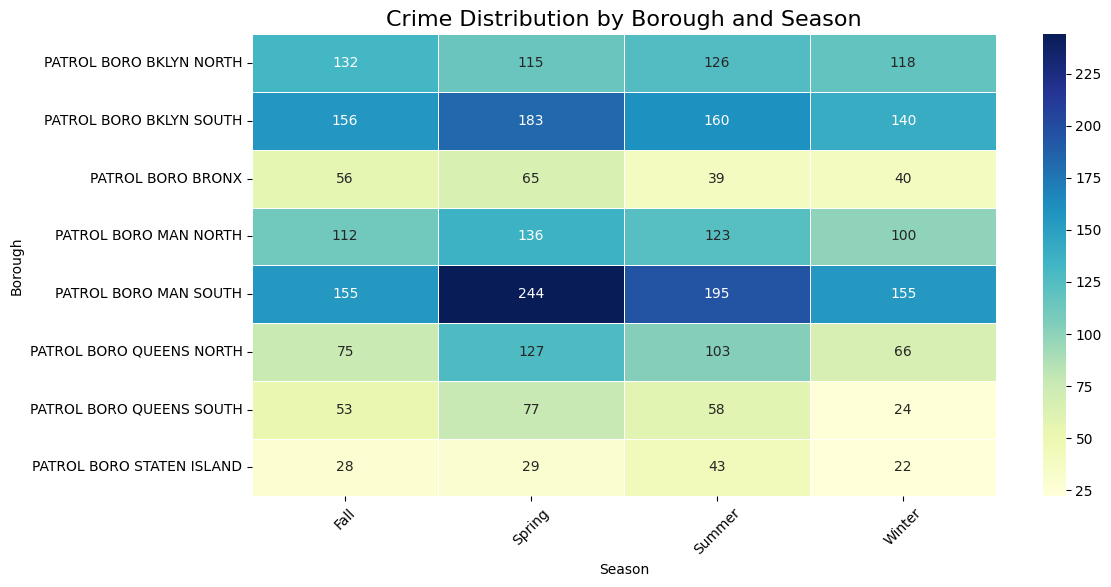

/var/folders/y4/9vz004zd1mn61kmn2mm9mndw0000gn/T/ipykernel_52136/4161123616.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bias.values, y=top_bias.index, palette="mako")


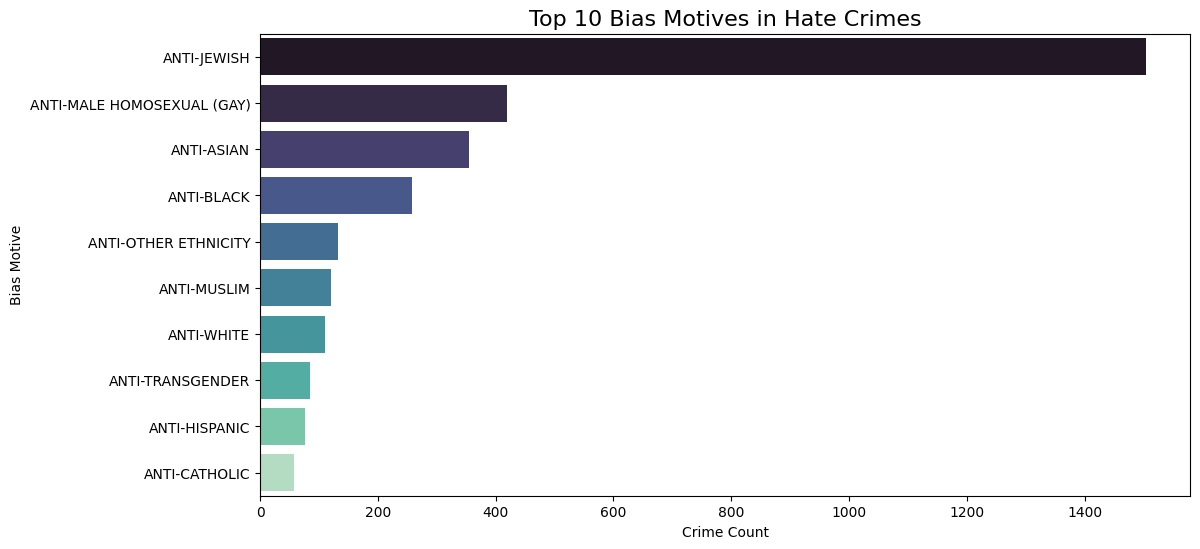

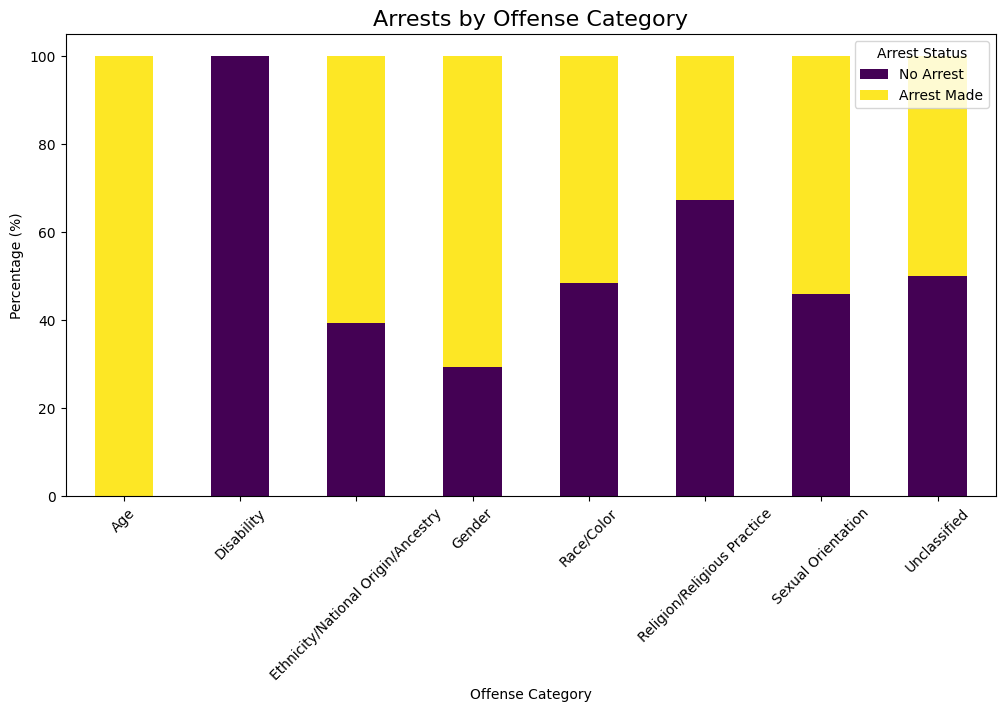

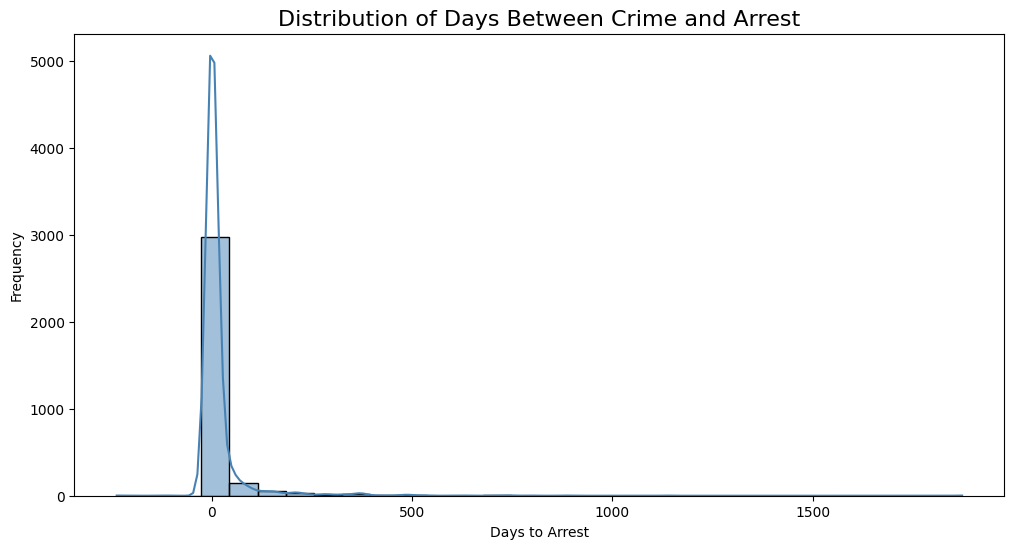

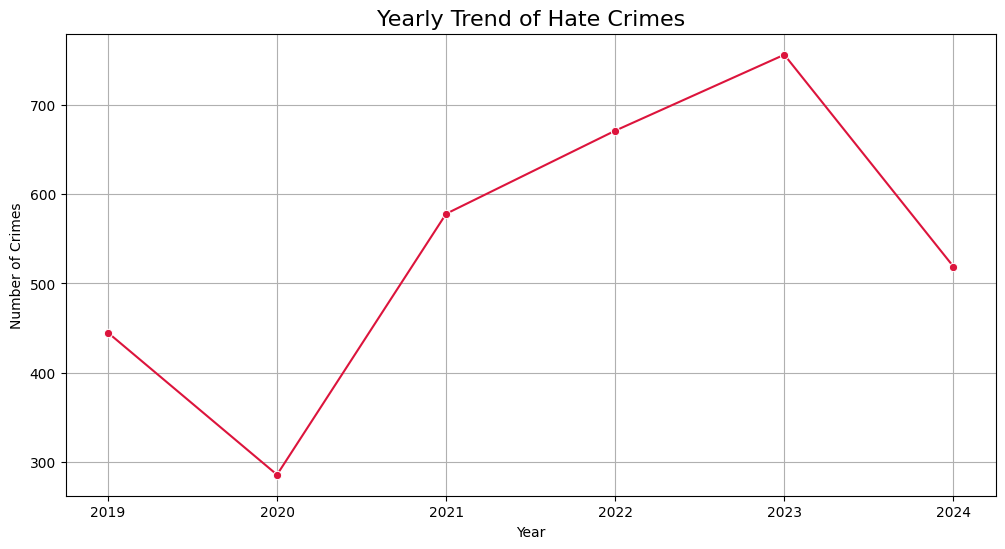


📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3255 entries, 0 to 3254
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Full Complaint ID              3255 non-null   int64         
 1   Complaint Year Number          3255 non-null   int64         
 2   Month Number                   3255 non-null   int64         
 3   Record Create Date             3255 non-null   datetime64[ns]
 4   Complaint Precinct Code        3255 non-null   int64         
 5   Patrol Borough Name            3255 non-null   object        
 6   County                         3255 non-null   object        
 7   Law Code Category Description  3255 non-null   object        
 8   Offense Description            3255 non-null   object        
 9   PD Code Description            3255 non-null   object        
 10  Bias Motive Description        3255 non-null   object        
 11  

In [15]:
# 📚 Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# 📊 Load Dataset
file_path = "NYPD_Hate_Crimes.csv"  
df = pd.read_csv(file_path)

# 🧹 **Data Cleaning and Feature Engineering**
# Converting dates to datetime format
df['Record Create Date'] = pd.to_datetime(df['Record Create Date'], errors='coerce')
df['Arrest Date'] = pd.to_datetime(df['Arrest Date'], errors='coerce')

# Extracting Year, Month, and Season
df['Year'] = df['Record Create Date'].dt.year
df['Month'] = df['Record Create Date'].dt.month
df['Season'] = df['Month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
})

# Creating new features
df['Arrest_Made'] = df['Arrest Date'].notna().astype(int)  # 1 if arrest made, 0 otherwise
df['Days_To_Arrest'] = (df['Arrest Date'] - df['Record Create Date']).dt.days

# Fill missing values for non-arrested cases with a placeholder
df['Days_To_Arrest'] = df['Days_To_Arrest'].fillna(-1)

# 🔎 **Crime Distribution by Borough and Season**
fig, ax = plt.subplots(figsize=(12, 6))

# Grouping and pivoting data
season_borough = df.groupby(['Patrol Borough Name', 'Season']).size().reset_index(name='Count')

# Correct pivot syntax with fill_value=0
pivot = season_borough.pivot_table(index="Patrol Borough Name", 
                                   columns="Season", 
                                   values="Count", 
                                   fill_value=0, 
                                   aggfunc='sum')  # Ensure aggregation works properly

# Plotting heatmap
sns.heatmap(pivot, annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5)
plt.title('Crime Distribution by Borough and Season', fontsize=16)
plt.ylabel('Borough')
plt.xlabel('Season')
plt.xticks(rotation=45)
plt.show()

# 🔎 **Top 10 Bias Motives in Hate Crimes**
top_bias = df['Bias Motive Description'].value_counts().head(10)
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=top_bias.values, y=top_bias.index, palette="mako")
plt.title('Top 10 Bias Motives in Hate Crimes', fontsize=16)
plt.xlabel('Crime Count')
plt.ylabel('Bias Motive')
plt.show()

# 🔎 **Arrests by Offense Category**
arrest_by_offense = df.groupby('Offense Category')['Arrest_Made'].value_counts(normalize=True).unstack().fillna(0) * 100
fig, ax = plt.subplots(figsize=(12, 6))
arrest_by_offense.plot(kind='bar', stacked=True, colormap='viridis', ax=ax)
plt.title('Arrests by Offense Category', fontsize=16)
plt.xlabel('Offense Category')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Arrest Status', labels=['No Arrest', 'Arrest Made'])
plt.show()

# 🔎 **Time-to-Arrest Distribution**
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(df['Days_To_Arrest'], bins=30, kde=True, color='steelblue')
plt.title('Distribution of Days Between Crime and Arrest', fontsize=16)
plt.xlabel('Days to Arrest')
plt.ylabel('Frequency')
plt.show()

# 🔎 **Yearly Trend of Hate Crimes**
fig, ax = plt.subplots(figsize=(12, 6))
crime_trend = df['Year'].value_counts().sort_index()
sns.lineplot(x=crime_trend.index, y=crime_trend.values, marker='o', color='crimson')
plt.title('Yearly Trend of Hate Crimes', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

# 🔎 **General Statistics**
print("\n📊 Dataset Info:")
print(df.info())

In [17]:
print("\n🔎 Missing Values:")
print(df.isnull().sum())



🔎 Missing Values:
Full Complaint ID                   0
Complaint Year Number               0
Month Number                        0
Record Create Date                  0
Complaint Precinct Code             0
Patrol Borough Name                 0
County                              0
Law Code Category Description       0
Offense Description                 0
PD Code Description                 0
Bias Motive Description             0
Offense Category                    0
Arrest Date                      1849
Arrest Id                        1849
Year                                0
Month                               0
Season                              0
Arrest_Made                         0
Days_To_Arrest                      0
dtype: int64


In [18]:
print("\n🔎 Dataset Summary:")
print(df.describe())


🔎 Dataset Summary:
       Full Complaint ID  Complaint Year Number  Month Number  \
count       3.255000e+03             3255.00000   3255.000000   
mean        2.021845e+14             2021.78679      6.300461   
min         2.019001e+14             2019.00000      1.000000   
25%         2.021013e+14             2021.00000      3.000000   
50%         2.022061e+14             2022.00000      6.000000   
75%         2.023077e+14             2023.00000      9.000000   
max         2.024123e+14             2024.00000     12.000000   
std         1.608058e+11                1.60860      3.291799   

                  Record Create Date  Complaint Precinct Code  \
count                           3255              3255.000000   
mean   2022-04-09 09:47:03.594470144                58.571736   
min              2019-01-01 00:00:00                 1.000000   
25%              2021-03-28 12:00:00                19.000000   
50%              2022-06-07 00:00:00                63.000000   
75% 

In [19]:
print("\n🔎 Season Crime Distribution:")
print(df['Season'].value_counts())


🔎 Season Crime Distribution:
Season
Spring    976
Summer    847
Fall      767
Winter    665
Name: count, dtype: int64


In [20]:
print("\n🔎 Top 10 Bias Motives:")
print(df['Bias Motive Description'].value_counts().head(10))


🔎 Top 10 Bias Motives:
Bias Motive Description
ANTI-JEWISH                   1504
ANTI-MALE HOMOSEXUAL (GAY)     420
ANTI-ASIAN                     355
ANTI-BLACK                     257
ANTI-OTHER ETHNICITY           133
ANTI-MUSLIM                    121
ANTI-WHITE                     110
ANTI-TRANSGENDER                84
ANTI-HISPANIC                   77
ANTI-CATHOLIC                   57
Name: count, dtype: int64


In [21]:
print("\n🔎 Arrest Rate by Offense Category:")
print(df.groupby('Offense Category')['Arrest_Made'].mean().round(2))

print("\n✅ Enhanced EDA Completed Successfully!")


🔎 Arrest Rate by Offense Category:
Offense Category
Age                                   1.00
Disability                            0.00
Ethnicity/National Origin/Ancestry    0.61
Gender                                0.71
Race/Color                            0.52
Religion/Religious Practice           0.33
Sexual Orientation                    0.54
Unclassified                          0.50
Name: Arrest_Made, dtype: float64

✅ Enhanced EDA Completed Successfully!


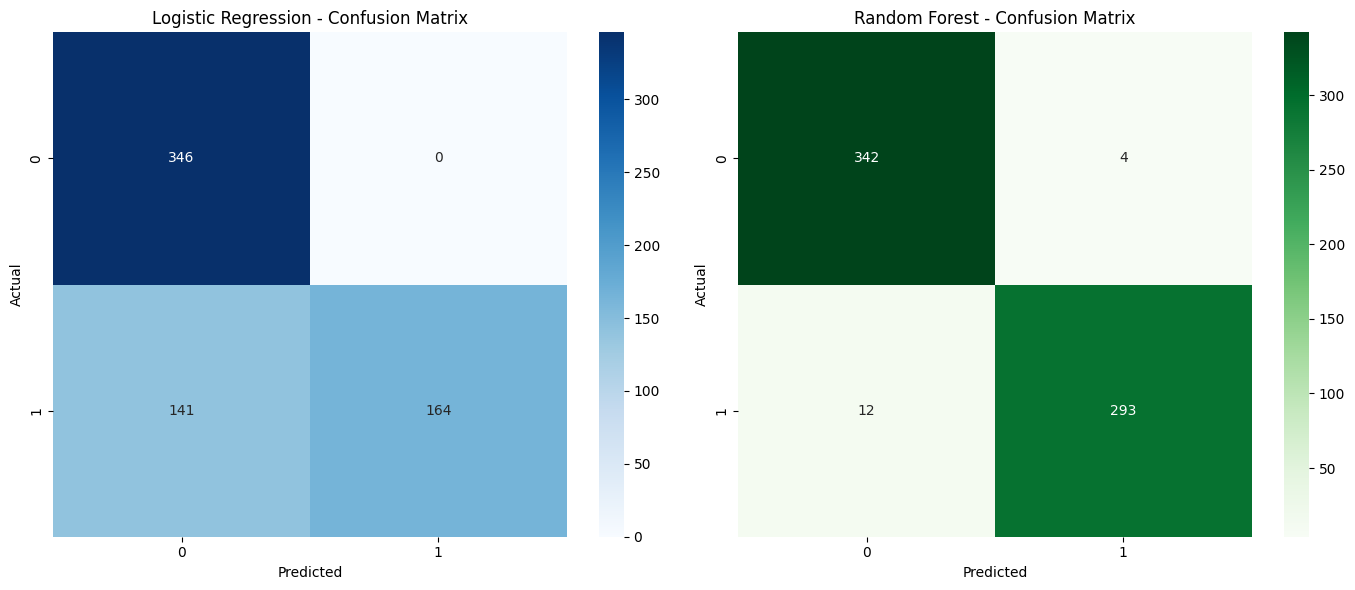

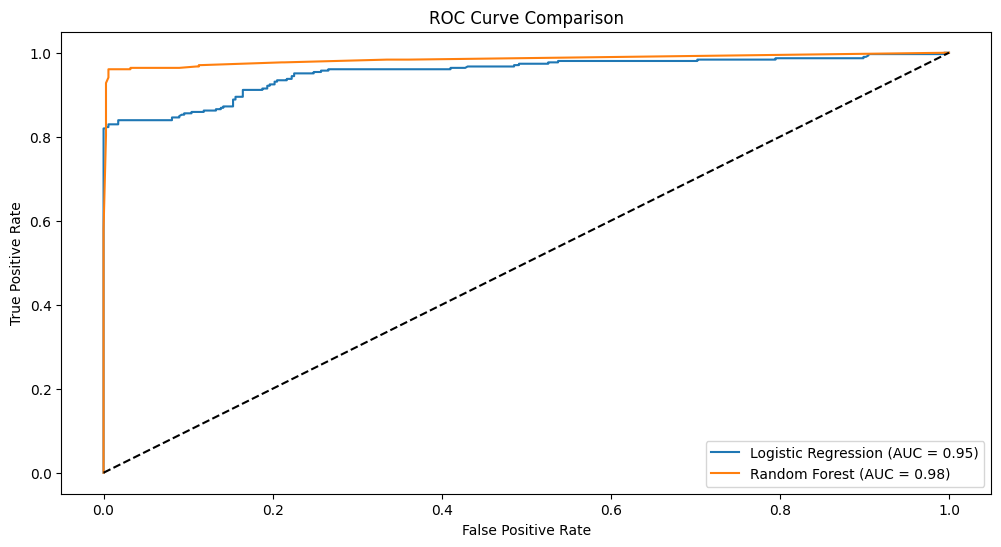

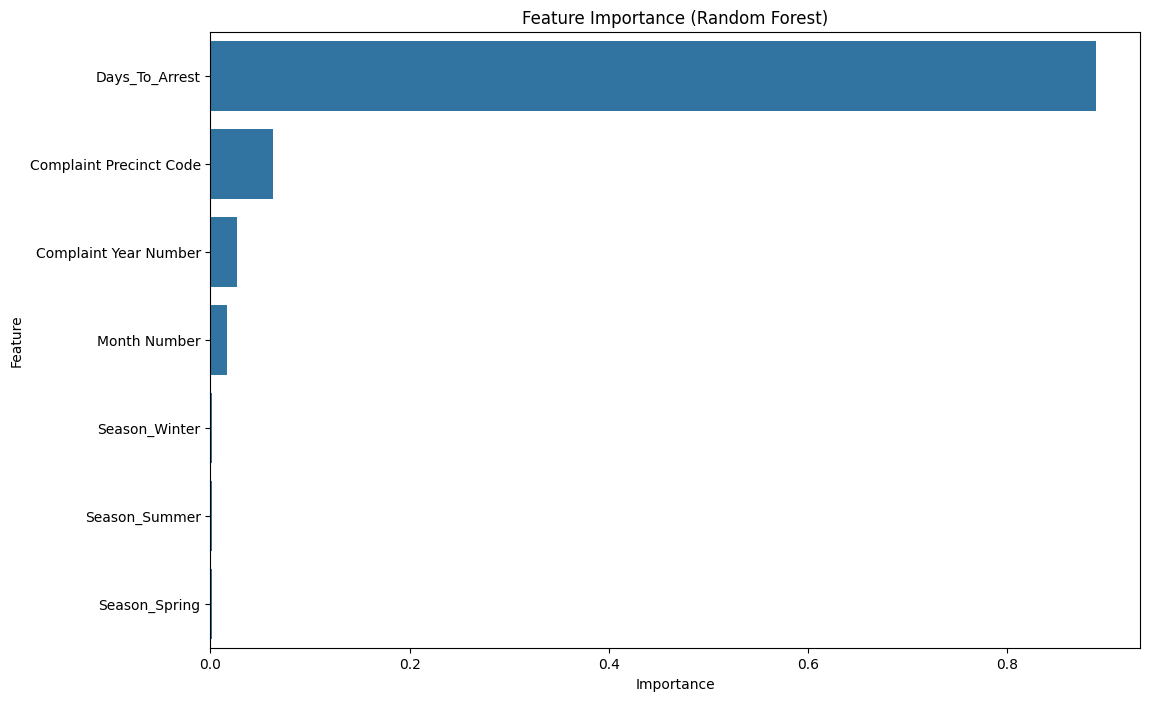

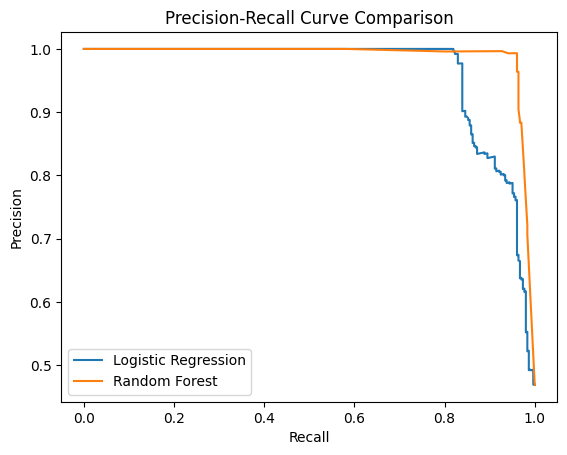


🔍 Logistic Regression Results
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       346
           1       1.00      0.54      0.70       305

    accuracy                           0.78       651
   macro avg       0.86      0.77      0.77       651
weighted avg       0.85      0.78      0.77       651


🔥 Random Forest Results
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       346
           1       0.99      0.96      0.97       305

    accuracy                           0.98       651
   macro avg       0.98      0.97      0.98       651
weighted avg       0.98      0.98      0.98       651


✅ Final Model Training, Evaluation, and Saving Completed Successfully!


In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


# ✅ Data Cleaning and Feature Engineering
# Fill missing values
df.fillna('Unknown', inplace=True)

# Create target variable: Arrest made (1 if an arrest occurred, 0 otherwise)
df['Arrest_Made'] = df['Arrest Id'].apply(lambda x: 1 if x != 'Unknown' else 0)

# Define features and target
X = df.drop(['Arrest Id', 'Arrest Date', 'Full Complaint ID', 'Record Create Date', 'Arrest_Made'], axis=1)
y = df['Arrest_Made']

# Separate numerical and categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

# 🔥 Preprocessing: OneHotEncode categorical + scale numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first'), cat_cols)
    ]
)

# ✅ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📈 Logistic Regression Model with GridSearchCV
log_reg = LogisticRegression(max_iter=5000)
param_grid_lr = {'C': [0.01, 0.1, 1, 10]}
grid_lr = GridSearchCV(log_reg, param_grid_lr, cv=5, scoring='f1')

# Pipeline for Logistic Regression
pipe_lr = Pipeline(steps=[('preprocessor', preprocessor), ('model', grid_lr)])
pipe_lr.fit(X_train, y_train)

# ✅ Logistic Regression Predictions
y_pred_lr = pipe_lr.predict(X_test)
y_prob_lr = pipe_lr.predict_proba(X_test)[:, 1]

# 🔥 Random Forest Model with GridSearchCV
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1')

# Pipeline for Random Forest
pipe_rf = Pipeline(steps=[('preprocessor', preprocessor), ('model', grid_rf)])
pipe_rf.fit(X_train, y_train)

# ✅ Random Forest Predictions
y_pred_rf = pipe_rf.predict(X_test)
y_prob_rf = pipe_rf.predict_proba(X_test)[:, 1]

# 💾 Save the Models for Reproducibility
joblib.dump(pipe_lr, 'logistic_regression_model.pkl')
joblib.dump(pipe_rf, 'random_forest_model.pkl')

# ✅ Evaluation and Visualizations

# 📉 Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Logistic Regression Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression - Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Random Forest - Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# ✅ ROC Curve Comparison
plt.figure(figsize=(12, 6))

# Logistic Regression ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')

# Random Forest ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

# ✅ Feature Importance for Random Forest
# ✅ Feature Importance for Random Forest (Fixed)

# Access the best model from the pipeline
best_rf_pipeline = pipe_rf.named_steps['model'].best_estimator_

# Extract feature names properly
# Get numerical feature names
num_features = num_cols.to_list()

# Get one-hot-encoded categorical feature names
cat_features = pipe_rf.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(cat_cols).tolist()

# Combine all feature names
all_features = num_features + cat_features

# Extract feature importances
feature_importances = best_rf_pipeline.feature_importances_

# Create a DataFrame for visualization
feat_imp_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# 🔥 Visualization
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# Logistic Regression
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_prob_lr)
plt.plot(recall_lr, precision_lr, label='Logistic Regression')

# Random Forest
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_prob_rf)
plt.plot(recall_rf, precision_rf, label='Random Forest')

# Plot settings
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve Comparison')
plt.legend()
plt.show()

# ✅ Display Results
print("\n🔍 Logistic Regression Results")
print(classification_report(y_test, y_pred_lr))

print("\n🔥 Random Forest Results")
print(classification_report(y_test, y_pred_rf))

# 🎯 DONE!
print("\n✅ Final Model Training, Evaluation, and Saving Completed Successfully!")

